## CAR PRICE PREDICTION WITH MACHINE LEARNING

### Import the libraries and load the dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
car_df = pd.read_csv('car data.csv')
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Exploratory Data Analysis

In [47]:
car_df.shape

(301, 9)

In [48]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [49]:
# make all column names lower case
car_df.columns = car_df.columns.str.lower()
car_df.head()

,car_name,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [50]:
# Descriptive analysis
car_df.describe()

,year,selling_price,present_price,driven_kms,owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


#### Checking for Inconsistencies

In [51]:
# Checking for missing values
car_df.isnull().sum()

car_name         0
year             0
selling_price    0
present_price    0
driven_kms       0
fuel_type        0
selling_type     0
transmission     0
owner            0
dtype: int64

In [52]:
# check for inconsistent data entries in columns
un_name = car_df['car_name'].unique()
un_fuel = car_df['fuel_type'].unique()
un_sell = car_df['selling_type'].unique()
un_tran = car_df['transmission'].unique()
un_owner = car_df['owner'].unique()

print(f'Unique name: {un_name}\n\nUnique fuel type: {un_fuel}\n\nUnique selling type: {un_sell}')
print(f'\nUnique transmission type: {un_tran}\n\nUnique owner: {un_owner}')

Unique name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220'

##### Observations:
There are no missing values in our dataset, the car names in the car_name column look like there are no repeated values 
due to misspelling of capitalisation or upper case characters. 

In [53]:
# Let's check for duplicate values
print('Total duplicates: ')
car_df.duplicated().sum()

Total duplicates: 


2

In [54]:
# Drop the duplicated columns
car_df = car_df.drop_duplicates()
car_df.duplicated().sum()



0

In [55]:
# Check the shape again and see that it has less rows now
car_df.shape

(299, 9)

### Data Visualisation and Analysis

C:\Users\kmas\AppData\Local\Temp\ipykernel_6768\2157843562.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(car_df['selling_price'], palette='bright')


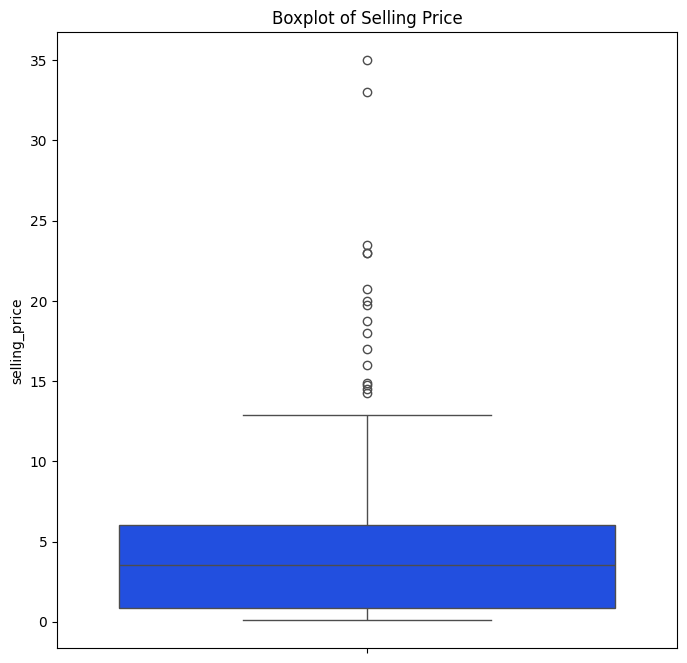

In [56]:
# Checking for ouliers
plt.figure(figsize=(8, 8))
sns.boxplot(car_df['selling_price'], palette='bright')
plt.title('Boxplot of Selling Price')
plt.show()

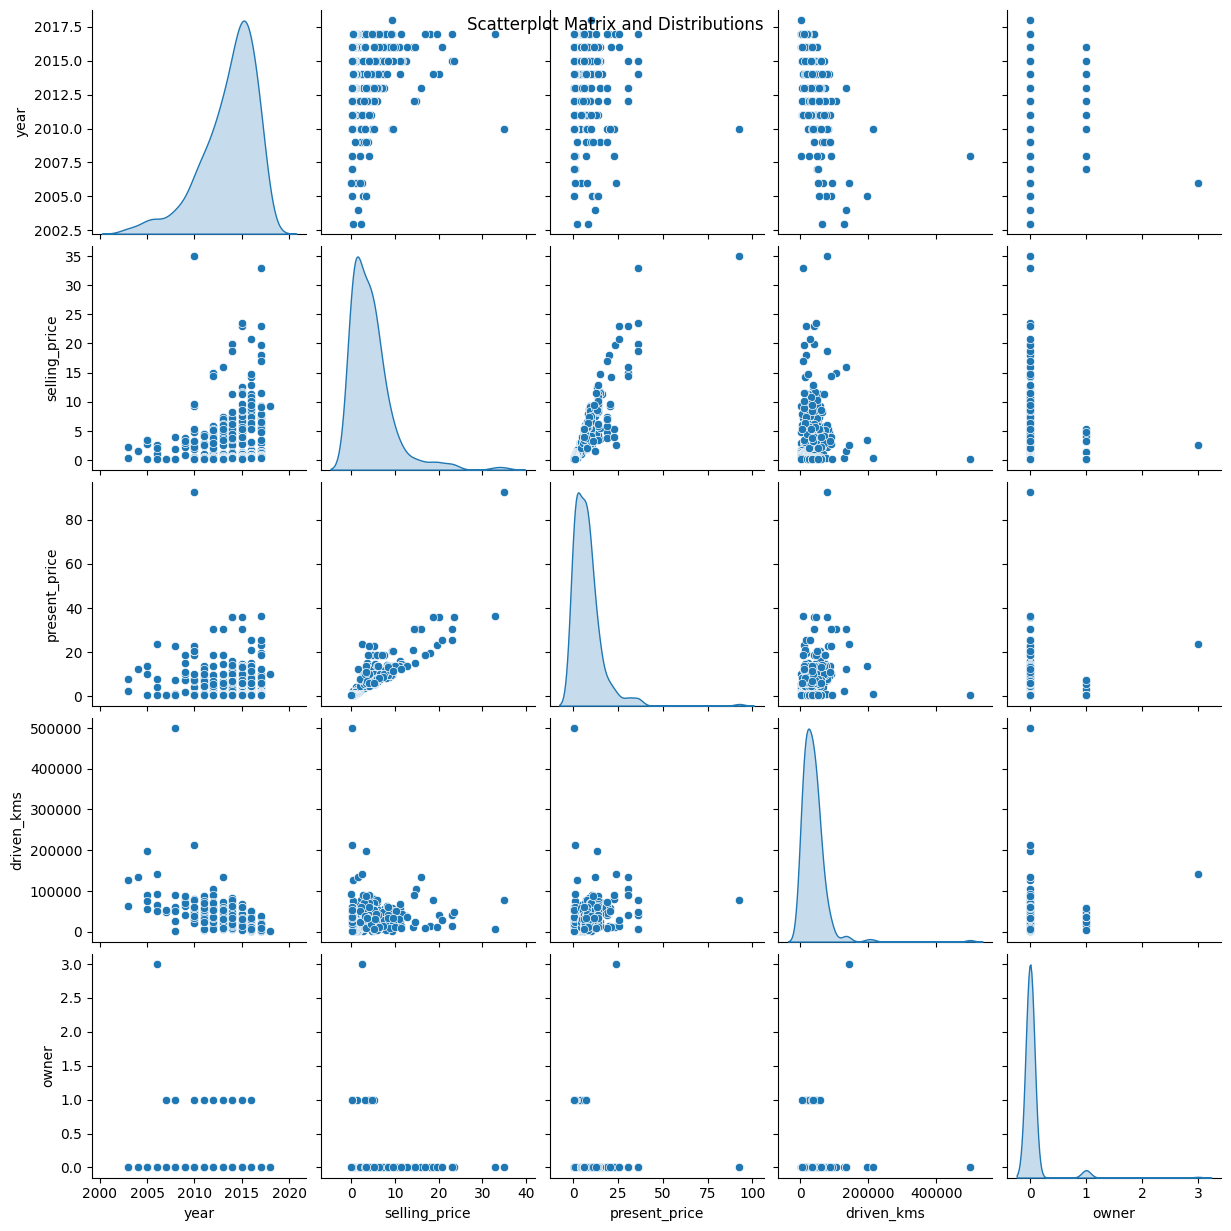

In [57]:

# Scatter Plot Matrix
num_columns = ['year', 'selling_price', 'present_price', 'driven_kms', 'owner']

num_columns_df = car_df[num_columns]
sns.pairplot(num_columns_df, diag_kind='kde') 
plt.suptitle("Scatterplot Matrix and Distributions") 
plt.show()

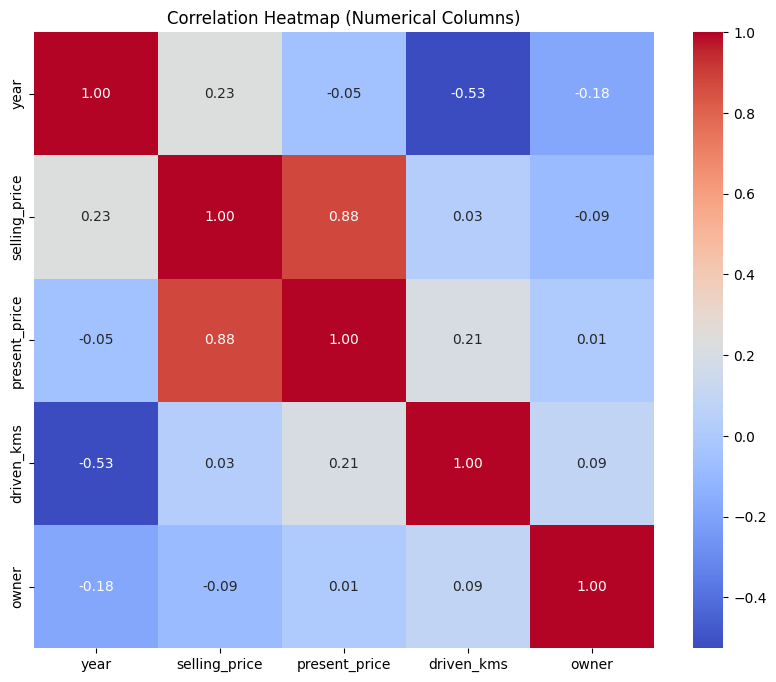

In [58]:
correlation_matrix = num_columns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

There is a strong correlation between present price and sales price

Driven_Kms shows a weak negative correlation with Selling Price and Present Price indicating that Cars with lower mileage  tend to sell for more.

### Analysis and Insight

C:\Users\kmas\AppData\Local\Temp\ipykernel_6768\1817577990.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selling_type_counts.index, y=selling_type_counts.values, palette= 'coolwarm')


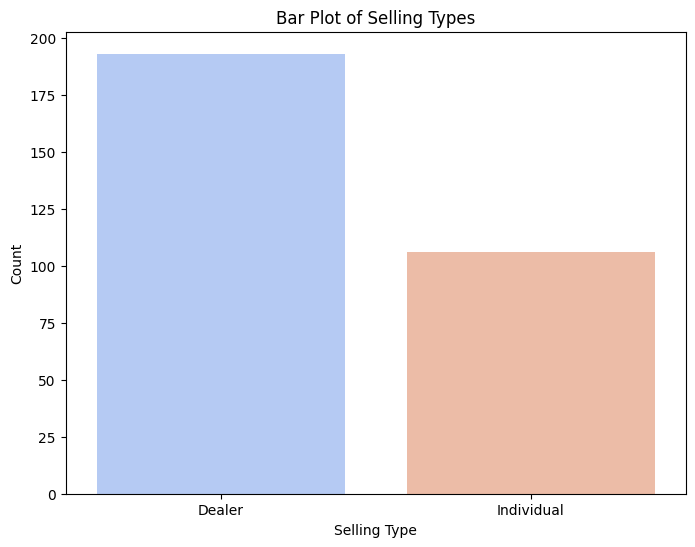

In [59]:
# Bar plot of selling types
selling_type_counts = car_df['selling_type'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=selling_type_counts.index, y=selling_type_counts.values, palette= 'coolwarm')
plt.xlabel('Selling Type')
plt.ylabel('Count')
plt.title('Bar Plot of Selling Types')
plt.show()

C:\Users\kmas\AppData\Local\Temp\ipykernel_6768\1718608362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette= 'coolwarm')


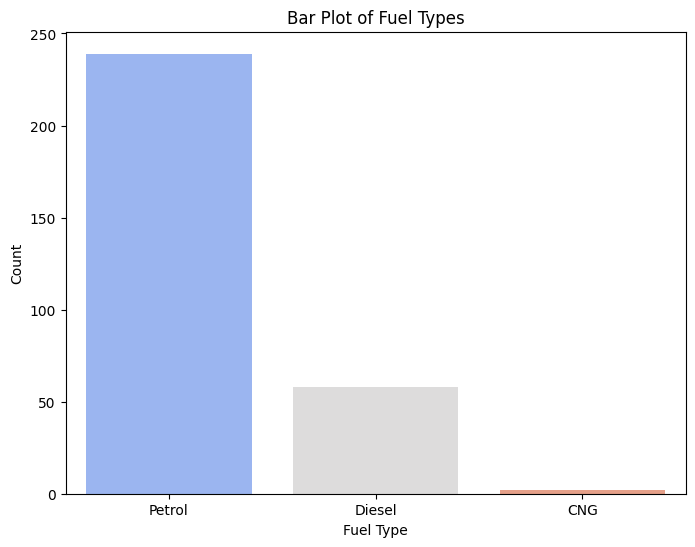

In [60]:
# Bar plot of fuel type
fuel_type_counts = car_df['fuel_type'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette= 'coolwarm')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Bar Plot of Fuel Types')
plt.show()

C:\Users\kmas\AppData\Local\Temp\ipykernel_6768\1734683440.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tran_type_counts.index, y=tran_type_counts.values, palette= 'coolwarm')


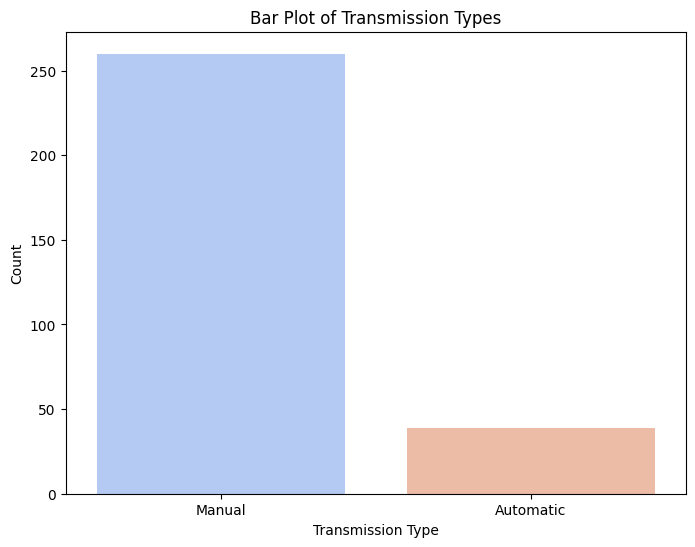

In [61]:
# Bar Plot of Transmission Types
tran_type_counts = car_df['transmission'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=tran_type_counts.index, y=tran_type_counts.values, palette= 'coolwarm')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Bar Plot of Transmission Types')
plt.show()

C:\Users\kmas\AppData\Local\Temp\ipykernel_6768\2083962855.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=owner_type_counts.index, y=owner_type_counts.values, palette= 'coolwarm')


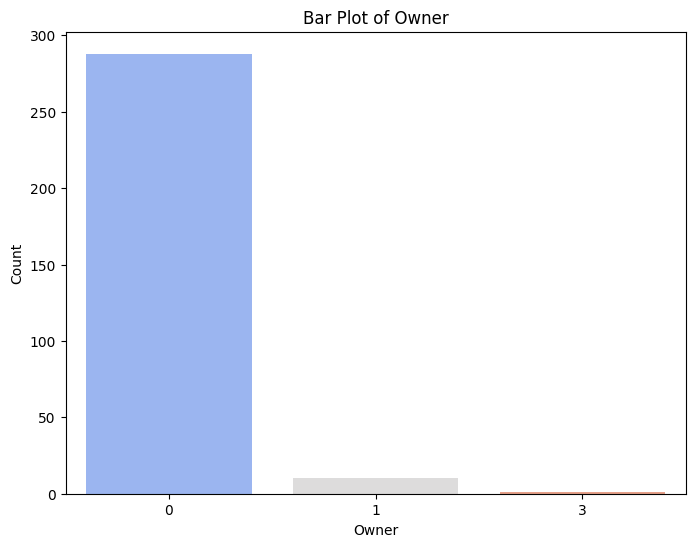

In [62]:
# Bar plot of owner types
owner_type_counts = car_df['owner'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=owner_type_counts.index, y=owner_type_counts.values, palette= 'coolwarm')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.title('Bar Plot of Owner')
plt.show()

## Building a Multi Linear Regression Model

#### Features and Target Selection

In [63]:
car_df.head()

,car_name,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [64]:
# First let's select our dependent and independent variables
X = car_df.drop(['car_name','selling_price'],axis=1)
y =car_df['selling_price']

#### Split the dataset into Training set and Test sets

In [65]:
# Split the dataset into Training set and Test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Encoding Categorical Columns

In [66]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Initialize OneHotEncoder with drop='first' to avoid dummy variable trap and ignore unknown categories during transformation
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


In [67]:
# Define the ColumnTransformer to apply OneHotEncoder to categorical features
column_transformer = ColumnTransformer(
    [('encoder', encoder, ['fuel_type', 'selling_type', 'transmission'])],
    remainder='passthrough') # Keep any other columns as they are

In [68]:
# Fit the ColumnTransformer on the training data
column_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['fuel_type', 'selling_type',
                                  'transmission'])])

In [69]:
# Transform the training and testing data
X_train_encoded = column_transformer.transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

#### Training  the Multiple Linear Regression Model

In [70]:
# Training  the Multiple Linear Regression model on the Training set

regressor = LinearRegression()
regressor.fit(X_train_encoded, y_train)

LinearRegression()

#### Predicting The Test Set Result and Evaluation

In [71]:
# Predict car selling price on the test set
y_pred = regressor.predict(X_test_encoded)

In [72]:
# Calculate the performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [73]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f"Coefficients: \n{regressor.coef_}")

Mean Squared Error: 6.373125106257308
R-squared: 0.7527233824221804
Coefficients: 
[ 2.14239115e+00  6.92516114e-01 -1.30229106e+00 -1.57342458e+00
  3.30031346e-01  4.37119343e-01 -1.05669420e-05  6.40143608e-01]


**The mean squared error (MSE)** of the model's predictions on the test set. MSE is calculated using mean_squared_error(y_test, y_pred), 
 y_test contains the actual values from the test set, and y_pred contains the model's predicted values for the test set.

**Coefficients** These are the coefficients of the linear regression model for each feature. These coefficients indicate the relationship between each feature and the target variable.

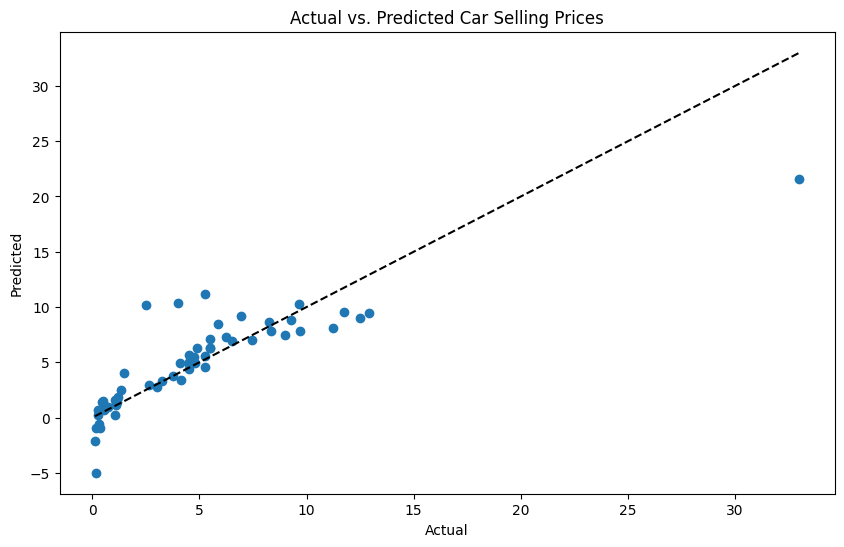

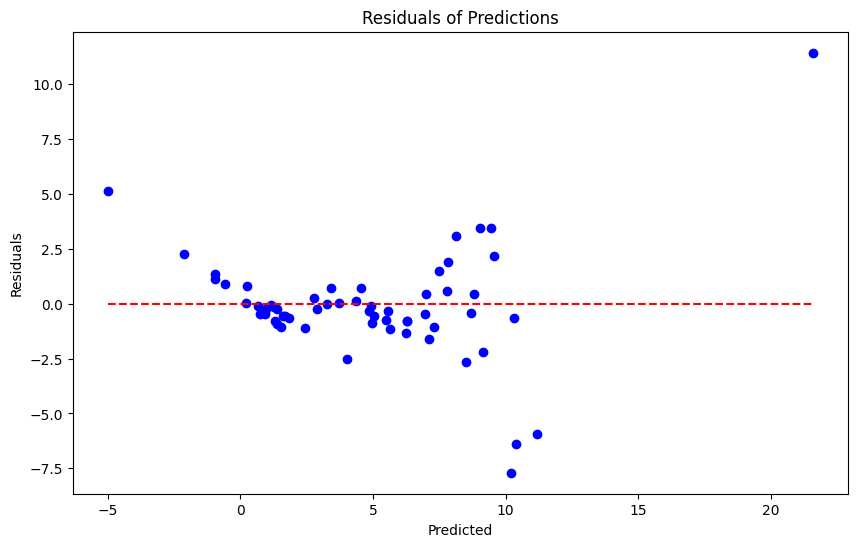

In [74]:

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Car Selling Prices')
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, c='blue')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.show()

In [75]:
# Prediction on unseen data

new_car = [[2021, 32000, 0, 1, 1, 0, 0, 1]]  # new car data
predicted_price = regressor.predict(new_car)
print(f'Predicted Selling Price: {predicted_price[0]: .2f}')


Predicted Selling Price:  25827.66
